In [157]:
import src.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<img src="./img/sofa.jpg" 
         alt="alternate text" 
         width=700
         align="center;"/>
    

# Let's have some fun...

## Find the most postive and negative characters

In [19]:
score_list = stats.get_sentiment_all_char()

In [20]:
df = pd.DataFrame(score_list)

In [24]:
df.sort_values('sentiment_score', ascending = False).head(3)

,character,sentiment_score
344,Waiters,0.8
133,Heather,0.7
207,Locksmith,0.7


In [25]:
df.sort_values('sentiment_score').head(3)

,character,sentiment_score
219,Marge,-0.50
259,Passenger,-0.28
5,Alison,-0.25


I don't remember any of those characters... Let's only include those which appeared at least 15 times in different episodes...

In [59]:
score_recurrent_char = stats.get_sentiment_recurrent_char(15)

In [60]:
df_rchar = pd.DataFrame(score_recurrent_char)

In [61]:
df_rchar.sort_values('sentiment_score', ascending = False).head(3)

,character,sentiment_score
9,Carol,0.103
4,Phoebe,0.101
13,Mike,0.092


[Carol](https://friends.fandom.com/wiki/Carol_Willick#:~:text=Carol%20Willick%20is%20Ross%20Geller,Jane%20Sibbett%20from%20then%20on.), Ross' lesbian ex-wife.

I am sure you know who [Phoebe](https://friends.fandom.com/wiki/Phoebe_Buffay) is...

[Mike](https://friends.fandom.com/wiki/Mike_Hannigan) , Phoebe's final husband.

<img src="img/Phoebe.gif" width="300" align="center">

In [62]:
df_rchar.sort_values('sentiment_score').head(3)

,character,sentiment_score
11,Both,0.013
12,Man,0.020
14,Gunther,0.049


'Both' and 'Man' seems to be a dummy character name, so the winner for the most pessimistic character goes to [Gunther](https://friends.fandom.com/wiki/Gunther), the poor lonely waiter at Central Perk !!

<img src="img/Gunther.gif" width="300" align="center">

## Appearances in Episodes

In [64]:
appearances = stats.get_appearances_char()

In [67]:
df_appea = pd.DataFrame([(key, value) for key,value in appearances.items()], columns = ['Character', 'Appearances'])
    

In [69]:
df_appea.sort_values('Appearances', ascending = False).head(15)

,Character,Appearances
1,Chandler,226
4,Joey,226
5,Monica,226
7,Phoebe,226
8,Rachel,226
9,Ross,226
0,All,120
87,Gunther,52
25,Woman,41
15,Guy,23


And Gunther appears again, as the secondary character with most appearances in the show, follow by Mike and Janice.

## Can we observe when Ross and Rachel broke up (a.k.a. 'were on a break') ?

In [74]:
df_all = pd.DataFrame(stats.get_sentiment_main_chars_per_episode())

In [86]:
df_ross = df_all[df_all.character == 'Ross'].reset_index(drop =True)
df_rachel = df_all[df_all.character == 'Rachel'].reset_index(drop =True)

Let's use a rolling window of 5 in order to smooth the noise...
In red, the episode where they broke up (Season 3 Episode 15, total episode number 59)

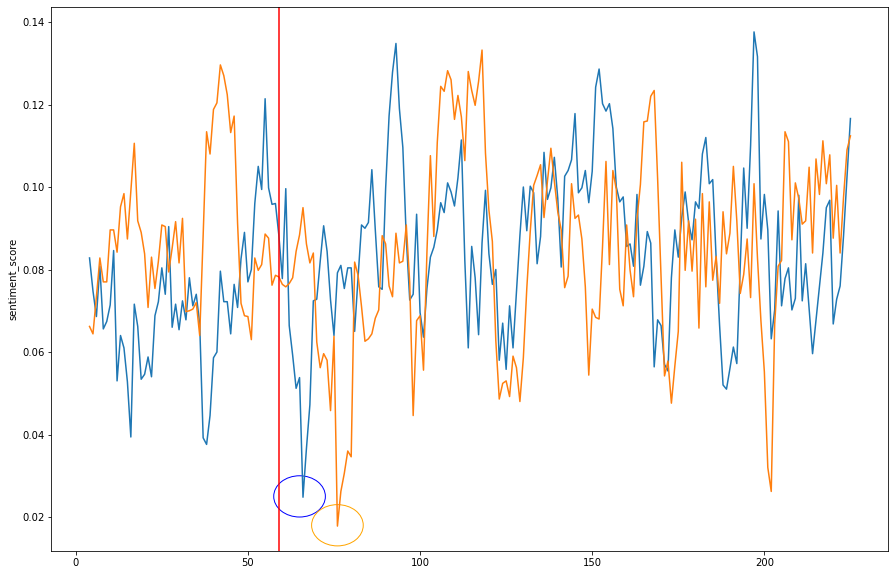

In [170]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x=df_ross.index, y= df_ross.sentiment_score.rolling(window=5).mean())
sns.lineplot(x=df_rachel.index, y= df_rachel.sentiment_score.rolling(window=5).mean())
plt.axvline(x = 59, ymin=0, ymax=1, color ='red')
circle1 = Ellipse((65, .025), 15, 0.01,  color='b', fill=False)
circle2 = Ellipse((76, .018), 15, 0.01, color='orange', fill=False)

ax.add_patch(circle1)
ax.add_patch(circle2)

plt.show()

For both, Ross and Rachel, their most pessimistic peak times are found some episode after their break-up.

<img src="img/break.gif" width="300" align="center">